In [1]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.layers import Conv2D,Conv1D,Conv2DTranspose,MaxPool2D,concatenate,Input
import matplotlib.pyplot as plt

In [2]:
image_path = '/Users/hemraj/Desktop/KawaSpace/images/'
ki = 'he_normal'

In [3]:
x = []
y = []
ones = np.ones((80,80,3))
zeros = np.zeros((80,80,3))
for i in range(990):
    image_p = image_path + str(i) + '.png'
    image = cv2.imread(image_p)
    mask_p = image_path + str(i) + 'mask.png'
    mask = cv2.imread(mask_p)
    diff = image-mask
    mask_ = diff==0
    new_mask = np.where(mask_==True,zeros,ones)
    new_mask = new_mask[:,:,0].reshape((80,80,1))
    image = image / 255
    x.append(image)
    y.append(new_mask)
    
x = np.asarray(x)
y = np.asarray(y)

In [4]:
inp = Input(shape=(80,80,3))

#Downsampling
c1 = Conv2D(32,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(inp)
c1 = Conv2D(32,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(c1)
p1 = MaxPool2D((2,2))(c1)

c2 = Conv2D(64,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(p1)
c2 = Conv2D(64,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(c2)
p2 = MaxPool2D((2,2))(c2)

c3 = Conv2D(128,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(p2)
c3 = Conv2D(128,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(c3)
p3 = MaxPool2D((2,2))(c3)

c4 = Conv2D(256,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(p3)
c4 = Conv2D(256,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(c4)

#Upsampling
c5 = Conv2DTranspose(128,kernel_size=2,strides=(2,2),kernel_initializer=ki,activation='relu',padding='same')(c4)
c5 = concatenate([c5,c3])
c5 = Conv2D(128,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(c5)


c6 = Conv2DTranspose(64,kernel_size=2,strides=(2,2),kernel_initializer=ki,activation='relu',padding='same')(c5)
c6 = concatenate([c6,c2])
c6 = Conv2D(64,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(c6)

c7 = Conv2DTranspose(32,kernel_size=2,strides=(2,2),kernel_initializer=ki,activation='relu',padding='same')(c6)
c7 = concatenate([c7,c1])
c7 = Conv2D(32,kernel_size=2,strides=(1,1),kernel_initializer=ki,activation='relu',padding='same')(c7)

c8 = Conv1D(1,kernel_size=1,strides=1,kernel_initializer=ki,activation='sigmoid',padding='same')(c7)


model = tf.keras.Model(inputs=inp,outputs=c8)

Metal device set to: Apple M1


2022-03-12 08:53:49.366915: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-12 08:53:49.367085: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 80, 80, 32)   416         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 80, 80, 32)   4128        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 40, 40, 32)   0           ['conv2d_1[0][0]']               
                                                                                              

In [7]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['mse'])
history = model.fit(x,y,epochs=20)

Epoch 1/20


2022-03-12 09:00:44.886366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 6s 170ms/step - loss: 309628224.0000 - mse: 0.1503
Epoch 2/20
31/31 [==============================] - 5s 168ms/step - loss: 3495495.0000 - mse: 0.1503
Epoch 3/20
31/31 [==============================] - 5s 167ms/step - loss: 1783572.7500 - mse: 0.1503
Epoch 4/20
31/31 [==============================] - 5s 167ms/step - loss: 397249.6562 - mse: 0.1503
Epoch 5/20
31/31 [==============================] - 5s 166ms/step - loss: 26.3532 - mse: 0.6127
Epoch 6/20
31/31 [==============================] - 6s 193ms/step - loss: 1.2665 - mse: 0.4899
Epoch 7/20
31/31 [==============================] - 5s 170ms/step - loss: 0.5791 - mse: 0.1880
Epoch 8/20
31/31 [==============================] - 5s 167ms/step - loss: 0.2807 - mse: 0.0791
Epoch 9/20
31/31 [==============================] - 5s 167ms/step - loss: 0.1830 - mse: 0.0473
Epoch 10/20
31/31 [==============================] - 5s 167ms/step - loss: 0.1685 - mse: 0.0434
Epoch 11/20
31/31 [===============

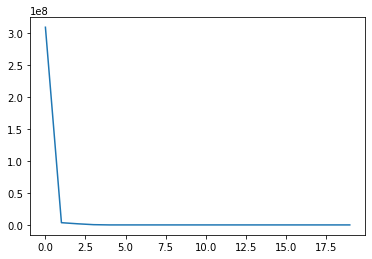

In [8]:
plt.plot(history.history['loss'])

In [14]:
pred = model.predict(tf.expand_dims(x[700],axis=0))

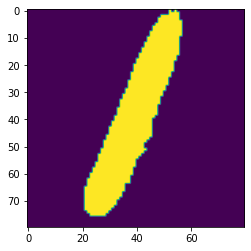

In [15]:
pred = np.squeeze(pred)
pred = pred > 0.5
pred = pred + 0
plt.imshow(pred)

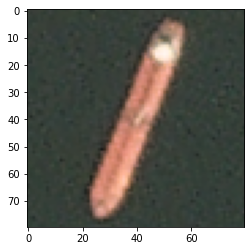

In [16]:
plt.imshow(x[700])

In [ ]:
np.count_nonzero(y[0])